In [ ]:
import kagglehub
import shutil
import os

# Download the dataset (default location)
downloaded_path = kagglehub.dataset_download("aamiraliansari/shelf-images-for-planograms")

# Your custom destination
destination_path = "datasets/shelf_planograms"

# Make sure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Move all contents to the custom folder
for item in os.listdir(downloaded_path):
    s = os.path.join(downloaded_path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.move(s, d)
    else:
        shutil.move(s, d)

print("Dataset moved to:", destination_path)

100%|██████████| 224M/224M [00:11<00:00, 21.2MB/s]

Extracting files...


Dataset moved to: datasets/shelf_planograms


In [ ]:
with open('/content/datasets/shelf_planograms/DATASET_Planogram/data.yaml', 'w') as f:
    f.write('''
train: /content/datasets/shelf_planograms/DATASET_Planogram/train/images
val: /content/datasets/shelf_planograms/DATASET_Planogram/valid/images

nc: 1
names: ['void']
''')

In [ ]:
!pip install opencv-python torch torchvision yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 63.7 MB/s eta 0:00:00

In [ ]:
!yolov5 train --data /content/datasets/shelf_planograms/DATASET_Planogram/data.yaml --weights yolov5s.pt --batch-size 16 --img 640

Streaming output truncated to the last 5000 lines.
      63/99      4.52G    0.03162    0.03442          0        101        640:  86% 113/131 [00:48<00:09,  1.82it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.52G     0.0316    0.03439          0        111        640:  87% 114/131 [00:49<00:07,  2.20it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.52G    0.03155    0.03437          0        129        640:  88% 115/131 [00:50<00:10,  1.57it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.52G    0.03151    0.03434          0        122        640:  89% 116/131 [00:50<00:07,  1.91it/s]`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
      63/99      4.52G    0.03153    0.03437         

In [ ]:
!yolov5 val --data /content/datasets/shelf_planograms/DATASET_Planogram/data.yaml --weights /content/runs/train/exp3/weights/best.pt --img 640

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-22 08:32:10.936726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745310730.956907   34890 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745310730.963006   34890 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: Y

In [ ]:
import yolov5

# 🔹 1. Load your trained model
model = yolov5.load('/content/runs/train/exp3/weights/best.pt')

# 🔹 2. Set inference parameters
model.conf = 0.25       # Confidence threshold
model.iou = 0.45        # IoU threshold for NMS
model.agnostic = False  # NMS class-agnostic
model.multi_label = False
model.max_det = 1000    # Max detections per image

# 🔹 3. Inference on a single image
img_path = '/content/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_339_jpg.rf.118733467e21ed3a52d426fcacf94623.jpg'
results = model(img_path)  # runs at default size

# Optionally: with larger size
# results = model(img_path, size=1280)

# Optionally: with test-time augmentation
# results = model(img_path, augment=True)

# 🔹 4. Parse prediction results
# (x1, y1, x2, y2, confidence, class)
#predictions = results.pred[0]

#boxes = predictions[:, :4]      # Bounding box coordinates
#scores = predictions[:, 4]      # Confidence scores
#categories = predictions[:, 5]  # Class IDs (should all be 0 in your case)

# 🔹 5. Display results (Jupyter/Colab compatible)
#results.show()  # Pops up annotated image


/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
!pip install pillow

In [ ]:
import cv2
import matplotlib.pyplot as plt

preds = results.pred[0]

# Load image and make sure it's writable
img = cv2.imread(img_path)
img = img.copy()

# Draw bounding boxes
for *box, conf, cls in preds:
    x1, y1, x2, y2 = map(int, box)
    label = f'Empty Space {conf:.2f}'
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

# Convert to RGB for matplotlib
#img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('YOLOv5 Detections')
plt.show()

cv2.imwrite("output_yolo_2.jpg", img)

True

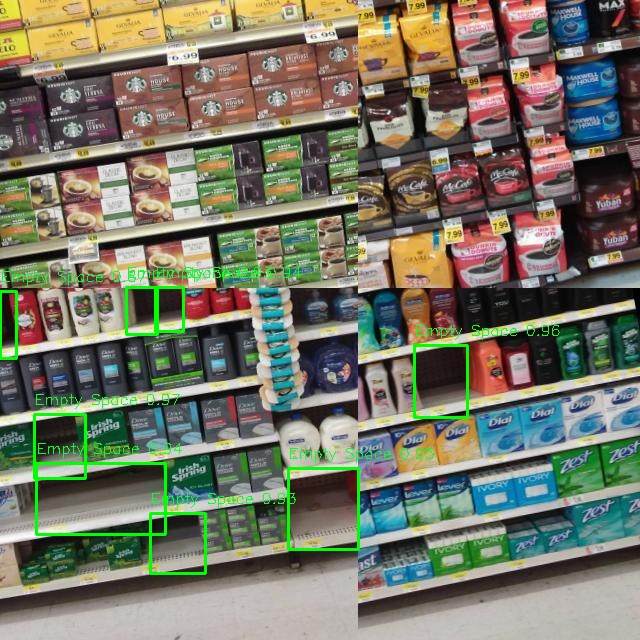

In [ ]:
from IPython.display import Image
Image("output_yolo_2.jpg")

In [ ]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Raw Image")
plt.show()

In [ ]:
cv2.imwrite("output.jpg", img)

True

In [ ]:
print(preds.shape)

torch.Size([7, 6])


In [ ]:
print(img.shape)

(640, 640, 3)


In [ ]:
get_ipython()

In [ ]:
!yolov5 detect --source /content/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_1162_jpg.rf.94386fb693f7a8ce5742115c6f6118ba.jpg

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-22 09:02:48.977242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745312568.998039   42742 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745312569.004241   42742 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: Y

In [ ]:
def filter_product_boxes(boxes, min_area=2000, max_aspect_ratio=2.5):
    product_boxes = []
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])
        w, h = x2 - x1, y2 - y1
        area = w * h
        aspect_ratio = max(w / h, h / w)

        if area > min_area and aspect_ratio < max_aspect_ratio:
            product_boxes.append([x1, y1, x2, y2])

    return product_boxes

In [ ]:
filtered_boxes = filter_product_boxes(preds)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and copy image
img_1 = img.copy()

# Draw filtered (product) boxes
for box in filtered_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(img_1, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img_1, "product", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 1)

# Convert to RGB and show
img_rgb_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)


In [ ]:
cv2.imwrite("output_yolo_fil.jpg", img_rgb_1)

True

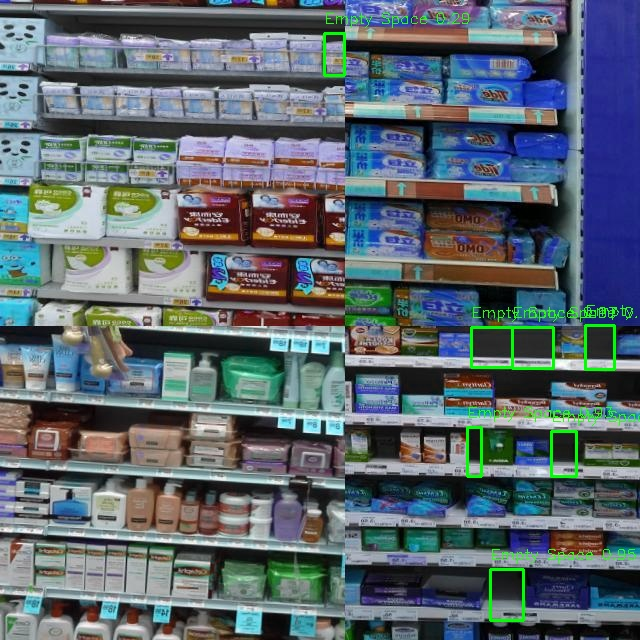

In [ ]:
from IPython.display import Image
Image("output_yolo_fil.jpg")

In [ ]:
print(f"Detected {len(filtered_boxes)} filtered product boxes.")

Detected 0 filtered product boxes.


In [ ]:
for i, box in enumerate(preds):
    x1, y1, x2, y2 = map(int, box[:4])
    w, h = x2 - x1, y2 - y1
    area = w * h
    aspect_ratio = max(w / h, h / w)
    print(f"Box {i}: Area = {area}, Aspect Ratio = {aspect_ratio:.2f}")

Box 0: Area = 1640, Aspect Ratio = 1.02
Box 1: Area = 1681, Aspect Ratio = 1.00
Box 2: Area = 1683, Aspect Ratio = 1.55
Box 3: Area = 1125, Aspect Ratio = 1.80
Box 4: Area = 686, Aspect Ratio = 3.50
Box 5: Area = 1276, Aspect Ratio = 1.52
Box 6: Area = 840, Aspect Ratio = 2.10


In [ ]:
def infer_product_boxes_from_gaps(gap_boxes, image_width):
    # Sort boxes left to right (x1 ascending)
    gap_boxes = sorted(gap_boxes, key=lambda b: b[0])

    product_boxes = []

    # If there's a space before the first gap
    if gap_boxes[0][0] > 5:
        product_boxes.append([0, gap_boxes[0][1], gap_boxes[0][0], gap_boxes[0][3]])

    # Between gaps
    for i in range(len(gap_boxes) - 1):
        x1 = gap_boxes[i][2]
        x2 = gap_boxes[i+1][0]
        y1 = min(gap_boxes[i][1], gap_boxes[i+1][1])
        y2 = max(gap_boxes[i][3], gap_boxes[i+1][3])
        if x2 > x1:
            product_boxes.append([x1, y1, x2, y2])

    # After the last gap
    last_gap = gap_boxes[-1]
    if last_gap[2] < image_width - 5:
        product_boxes.append([last_gap[2], last_gap[1], image_width, last_gap[3]])

    return product_boxes

In [ ]:
gap_boxes = [list(map(int, box[:4])) for box in preds]  # your YOLO results
img_2 = cv2.imread(img_path)
product_boxes = infer_product_boxes_from_gaps(gap_boxes, img_2.shape[1])

In [ ]:
# Draw gaps (red)
for box in gap_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(img_2, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Draw inferred products (green)
for box in product_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(img_2, (x1, y1), (x2, y2), (0, 255, 0), 2)

In [ ]:
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

cv2.imwrite("output_yolo_prod.jpg", img_rgb_2)

True

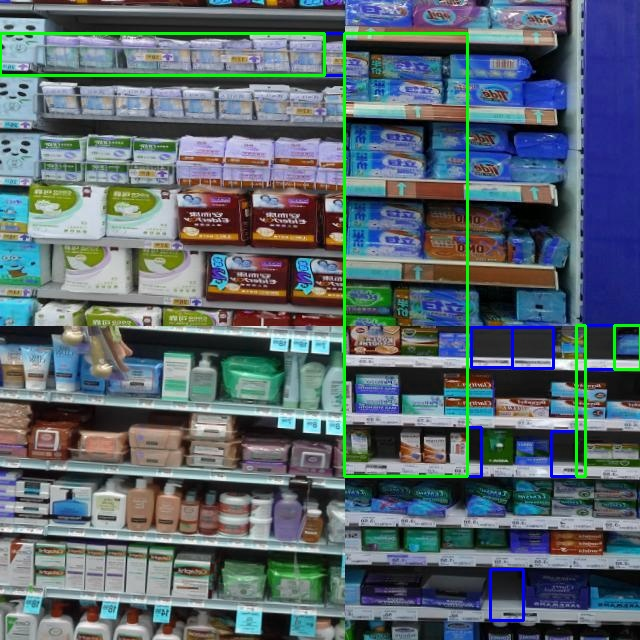

In [ ]:
from IPython.display import Image
Image("output_yolo_prod.jpg")